<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/AIModule5Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence**

# **Module 5: Introduction to Convolutional Neural Network - Assignment**

### **Problem Statement:**
The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). We have a dataset containing images of
cats and dogs and the objective is to train a CNN model to accurately predict the class of each image.

### **Objectives:**

**Data Preparation:**

● Download and extract the cats vs. dogs dataset.

● Organize the dataset into a structured directory format suitable for
TensorFlow’s ImageDataGenerator.

● Split the dataset into training and testing sets.

**Data Augmentation and Preprocessing:**

● Implement data augmentation techniques to increase the diversity of the
training dataset, aiding in the model's ability to generalize.

● Normalize the pixel values of the images for optimal model performance.
Model Building:

● Construct a Convolutional Neural Network using TensorFlow and Keras.

● The model should contain multiple convolutional layers, pooling layers, and
fully connected layers.

**Training:**

● Compile the model and train it on the prepared dataset.

● Utilize categorical cross entropy as the loss function and stochastic
gradient descent as the optimizer.

● Train the model for a sufficient number of epochs to achieve good
performance.

**Evaluation:**

● Evaluate the model's performance on the validation set during training to
monitor for overfitting.

● After training, assess the model's accuracy and make predictions on the
test set.

**Prediction:**

● Implement a system to make predictions on new images, categorizing
them as either cat or dog.

● The system should be able to take an image (or a batch of images),
preprocess it, and pass it through the model for prediction.

### **Step 1: Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
import shutil

### **Step 2: Data Preparation**

In [ ]:
import zipfile

# Define the dataset URL
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Download the dataset
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=False)

# Define base directory where the dataset should be extracted
base_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Extract manually if not already extracted
if not os.path.exists(base_dir):
    with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(path_to_zip))

# Verify extraction
print("Base Directory Exists:", os.path.exists(base_dir))
print("Contents of Base Directory:", os.listdir(base_dir) if os.path.exists(base_dir) else "Not found")


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Base Directory Exists: True
Contents of Base Directory: ['train', 'validation', 'vectorize.py']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
print("Train Directory Exists:", os.path.exists(train_dir))
print("Contents of Base Directory:", os.listdir(base_dir))


Train Directory Exists: True
Contents of Base Directory: ['train', 'validation', 'vectorize.py']


In [ ]:
# Define Paths for Dataset
original_train_dir = os.path.join(base_dir, 'train')
train_dir = os.path.join(base_dir, 'train_split')
test_dir = os.path.join(base_dir, 'test_split')

In [ ]:
# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
def split_data(source_dir, train_dir, test_dir, split_size=0.8):
    categories = ['cats', 'dogs']
    for category in categories:
        source_category_dir = os.path.join(source_dir, category)
        if not os.path.exists(source_category_dir):
            print(f"Error: Source directory {source_category_dir} not found!")
            continue  # Skip if category folder is missing

        train_category_dir = os.path.join(train_dir, category)
        test_category_dir = os.path.join(test_dir, category)

        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)

        files = os.listdir(source_category_dir)
        if len(files) == 0:
            print(f"Warning: No files found in {source_category_dir}")
            continue

        train_files, test_files = train_test_split(files, train_size=split_size, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(source_category_dir, file), os.path.join(train_category_dir, file))

        for file in test_files:
            shutil.copy(os.path.join(source_category_dir, file), os.path.join(test_category_dir, file))

split_data(original_train_dir, train_dir, test_dir)


In [ ]:
# Call the split_data function to populate train_dir and test_dir
split_data(original_train_dir, train_dir, test_dir, split_size=0.8) # This line is crucial!

### **Step 3: Data Augmentation and Preprocessing**

In [ ]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
# Build the CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### **Step 4: Training the Model**

In [ ]:
 # Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
print("Training directory:", train_dir, "->", os.listdir(train_dir))
print("Testing directory:", test_dir, "->", os.listdir(test_dir))

for category in ['cats', 'dogs']:
    print(f"{category} in training set:", len(os.listdir(os.path.join(train_dir, category))))
    print(f"{category} in test set:", len(os.listdir(os.path.join(test_dir, category))))


Training directory: /root/.keras/datasets/cats_and_dogs_filtered/train_split -> ['cats', 'dogs']
Testing directory: /root/.keras/datasets/cats_and_dogs_filtered/test_split -> ['cats', 'dogs']
cats in training set: 800
cats in test set: 200
dogs in training set: 800
dogs in test set: 200


In [ ]:
# Step 6: Train the Model
epochs = 15  # Define the number of epochs

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Dynamically set based on available data
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.4854 - loss: 0.7062 - val_accuracy: 0.5000 - val_loss: 0.7545
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5444 - loss: 0.6953 - val_accuracy: 0.5200 - val_loss: 0.6907
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5078 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5207 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6994
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5171 - loss: 0.6939 - val_accuracy: 0.5450 - val_loss: 0.6924
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.5275 - loss: 0.6928 - val_accuracy: 0.5650 - val_loss: 0.6914
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5549 - loss: 0.6896 - val_accuracy: 0.5275 - val_loss: 0.6924
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5067 - loss: 0.6937 - val_accuracy: 0.5900 - val_loss:

### **Step 5: Model Evaluation**

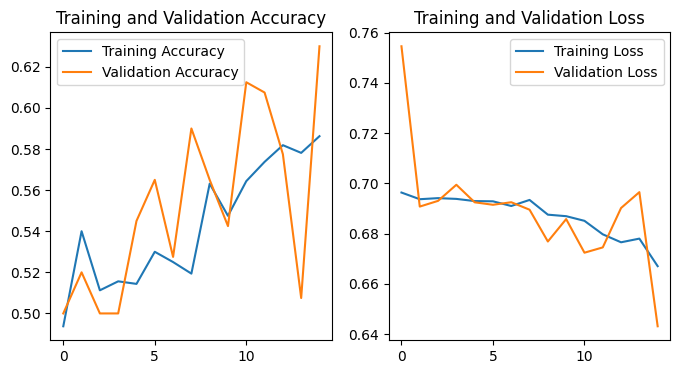

In [ ]:
# Evaluate the Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### **Step 6: Model Prediction**

In [ ]:
# Step 8: Predict on New Images
def predict_image(image_path, model):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return 'Dog' if prediction[0] > 0.5 else 'Cat'